# Welcome to the test results fucko

In [70]:
from results import Result
import matplotlib.pyplot as plt
from os import system, listdir
import numpy as np
from tqdm.notebook import trange

In [53]:
# Import the test results for comparison (methods not in compare module)

full_run = Result(path="/home/anders/Git/P8_ECM_based_OEF/results/runs/IES_E9H12G7-v1/None_20_1e-08_0.001.pkl")
full_run_heat_load = full_run.heat_network["heat load"]
full_run_gas_load = full_run.gas_network["gas load"]

result_file_names = [
    (
        int(file_name.split("/")[-1].split("_")[0]),
        "/home/anders/Git/P8_ECM_based_OEF/results/runs/IES_E9H12G7-v1/" + file_name
    )
    for file_name in listdir("/home/anders/Git/P8_ECM_based_OEF/results/runs/IES_E9H12G7-v1/") if "None" not in file_name
]
result_file_names.sort(key=lambda x: x[0])

result_heat_loads = [
    (
        cut_off,
        Result(path=file_name).heat_network["heat load"]
    )
    for cut_off, file_name in result_file_names
]

result_gas_loads = [
    (
        cut_off,
        Result(path=file_name).gas_network["gas load"]
    )
    for cut_off, file_name in result_file_names
]

In [80]:
# calculate the difference in loads between full run and other runs
heat_load_diff = [
    (
        cut_off,
        np.abs(np.sum(heat_load) - np.sum(full_run_heat_load))
    )
    for cut_off, heat_load in result_heat_loads
]
gas_load_diff = [
    (
        cut_off,
        np.abs(np.sum(gas_load) - np.sum(full_run_gas_load))
    )
    for cut_off, gas_load in result_gas_loads
]

1025.6764177040486


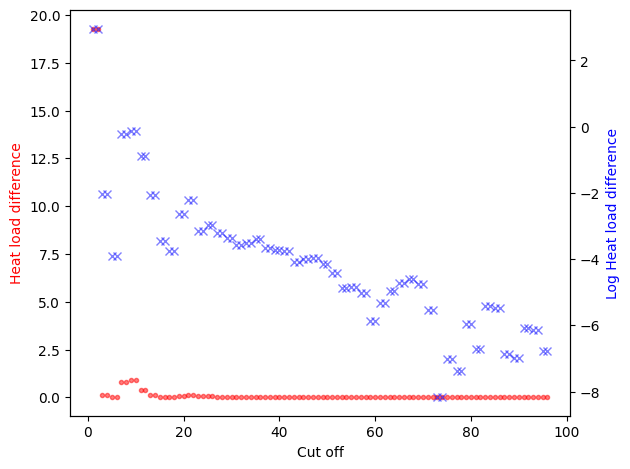

In [85]:
# Plot heat load difference
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Cut off")
ax1.set_ylabel("Heat load difference", color="red")
ax2.set_ylabel("Log Heat load difference", color="blue")

ax1.plot(
    [cut_off for cut_off, _ in heat_load_diff],
    [diff for _, diff in heat_load_diff],
    label="Heat load difference",
    color="red",
    marker=".",
    linestyle="None",
    alpha=0.5,
)
ax2.plot(
    [cut_off for cut_off, _ in heat_load_diff],
    [np.log(diff) for _, diff in heat_load_diff],
    label="Log Heat load difference",
    color="blue",
    marker="x",
    linestyle="None",
    alpha=0.5,
)

fig.tight_layout()
fig.savefig("figs/heat_load_diff.pdf")
print(np.sum(full_run_heat_load))

1025.6764177040486


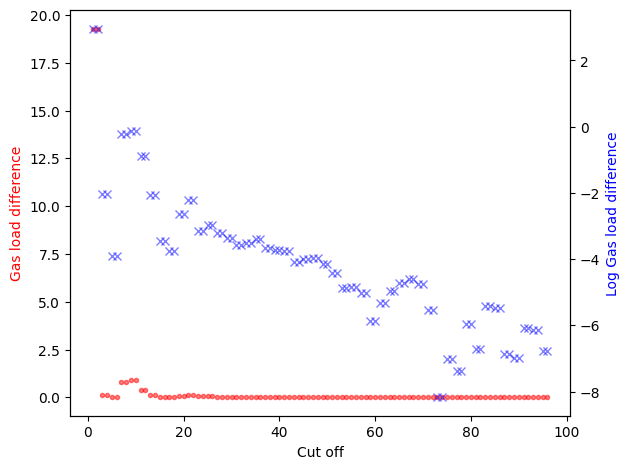

In [86]:
# Plot gas load difference
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Cut off")
ax1.set_ylabel("Gas load difference", color="red")
ax2.set_ylabel("Log Gas load difference", color="blue")

ax1.plot(
    [cut_off for cut_off, _ in gas_load_diff],
    [diff for _, diff in gas_load_diff],
    label="Gas load difference",
    color="red",
    marker=".",
    linestyle="None",
    alpha=0.5,
)
ax2.plot(
    [cut_off for cut_off, _ in gas_load_diff],
    [np.log(diff) for _, diff in gas_load_diff],
    label="Log Gas load difference",
    color="blue",
    marker="x",
    linestyle="None",
    alpha=0.5,
)

fig.tight_layout()
fig.savefig("figs/gas_load_diff.pdf")
print(np.sum(full_run_gas_load))

In [126]:
# Calculate the difference in production and load
heat_keys = ['CHP', 'gCHP', 'pump', 'boiler']
gas_keys = ['gas production', 'gas response']

heat_production_sums = [
    (
        cut_off,
        np.sum([np.sum(Result(path=file_name).heat_network[key]) for key in heat_keys])
    )
    for cut_off, file_name in result_file_names
]

In [127]:
for (cut_off1, heat_production_sum), (cut_off2, heat_load) in zip(heat_production_sums, result_heat_loads):
    assert cut_off1 == cut_off2
    print(heat_production_sum - np.sum(heat_load))

9050.730802845583
9050.730802845583
9103.590398957298
9103.590398957298
9103.61649925609
9103.61649925609
9105.19179927709
9105.19179927709
9104.246967026991
9104.246967026991
9103.82732009524
9103.82732009524
9102.754423288197
9102.754423288197
9102.86644740473
9102.86644740473
9102.669826547539
9102.669826547539
9102.988843139849
9102.988843139849
9103.024431314703
9103.024431314703
9103.028511848688
9103.028511848688
9102.98028713285
9102.98028713285
9103.008128155152
9103.008128155152
9102.95819373895
9102.95819373895
9102.99645845223
9102.99645845223
9102.953665517854
9102.953665517854
9102.938167501226
9102.938167501226
9102.945935566566
9102.945935566566
9102.937349102327
9102.937349102327
9102.928575674956
9102.928575674956
9102.922773295315
9102.922773295315
9102.92357379141
9102.92357379141
9102.921935119375
9102.921935119375
9102.91289259284
9102.91289259284
9102.922472398668
9102.922472398668
9102.891156866604
9102.891156866604
9102.885710027313
9102.885710027313
9102.86409

In [13]:
# legacy

# Ready commands for running cut_off test
execute_string = "~/uni_python/bin/python"

i_file = "-f 'instance/small case/IES_E9H12G7-v1.xlsx'"
cut_offs = [i for i in range(1, 95)]

args = [
    (i_file + " -c " + str(c))
    for c in cut_offs
]

execute_statements = [
    execute_string + " demo_usage.py " + arg
    for arg in args
]
execute_statements.append("~/uni_python/bin/python demo_usage.py -f 'instance/small case/IES_E9H12G7-v1.xlsx'")

# Run the cut_off test
import time
l = len(execute_statements)
times = []
for i in trange(0, l):
    start = time.time()
    system(execute_statements[i])
    end = time.time()
    times.append(end - start)

  0%|          | 0/3 [00:00<?, ?it/s]

[05-12 09:22:14] [INFO] Parse instance data successfully.
reading instance runs for 0.126s
forming PTDF matrix runs for 0.003s
forming LODF matrix runs for 0.001s
[05-12 09:22:14] [INFO] remove 7/51 nonzero elements in PTDF that are less than 1e-6.
[05-12 09:22:14] [INFO] remove 9/39 nonzero elements in LODF that are less than 1e-6.
initializing the electricity network runs for 0.006s
initializing the gas network runs for 0.048s
initializing the heating network runs for 0.054s
Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-11
Set parameter NumericFocus to value 3
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
add security constraints of sources (pre-calculation) runs for 0.304s
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2872 rows, 2030 columns and 363532 nonzeros
Model fingerpri